In [3]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance f

Text(0,0.5,'magnitud')

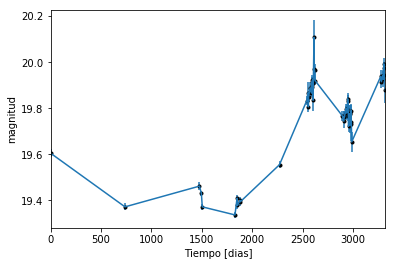

In [4]:
data = np.genfromtxt('LC_G_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [5]:
model = cm.CarmaModel(t, y, yerr, p=5, q=4)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

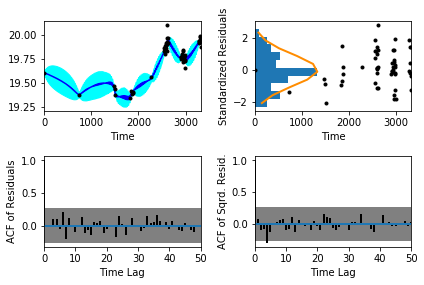

In [7]:
sample.assess_fit()

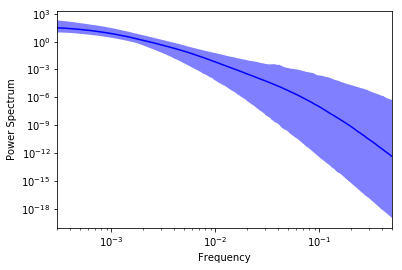

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0736159,'Nivel de ruido')

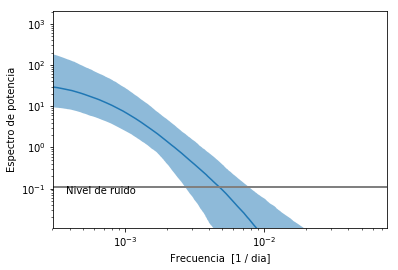

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [11]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [12]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [13]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 744.531641329
Median: 0.0290285394187
Standard deviation: 0.217878764643
68% credibility interval: [ 0.          0.31525154]
95% credibility interval: [ 0.          0.80558848]
99% credibility interval: [ 0.          0.96910214]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 744.531641329
Median: 0.0290285394187
Standard deviation: 0.217878764643
68% credibility interval: [ 0.          0.31525154]
95% credibility interval: [ 0.          0.80558848]
99% credibility interval: [ 0.          0.96910214]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 298.09550852
Median: 0.0
Standard deviation: 0.00679995971271
68% cred

Plotting parameter summary


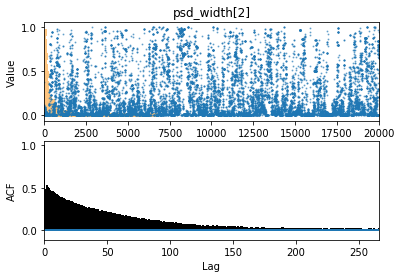

In [14]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [15]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 947.468410026
Median: 107.028264815
Standard deviation: 1.83041376524
68% credibility interval: [ 105.0081822   108.35460449]
95% credibility interval: [ 102.41550803  109.7123393 ]
99% credibility interval: [ 100.57414937  110.70378241]


In [17]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 6)

In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 252.192349457
Median: 2.16954979286
Standard deviation: 2.69767374159
68% credibility interval: [ 0.38523213  5.68132989]
95% credibility interval: [ 0.0691192   9.65080599]
99% credibility interval: [  0.02978891  12.3900602 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 191.003356516
Median: 1.51569192312
Standard deviation: 10.271635873
68% credibility interval: [  0.14369751  11.80242535]
95% credibility interval: [  6.10465960e-

In [19]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 519.950759855
Median: 1.16010902605e-14
Standard deviation: 2.86403132823e+12
68% credibility interval: [  1.55390190e-41   4.02758772e-03]
95% credibility interval: [  3.51474347e-66   7.11651235e+01]
99% credibility interval: [  4.17282640e-84   3.29806233e+08]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 985.328604694
Median: 3.7195593238e-12
Standard deviation: 200146106915.0
68% credibility interval: [  8.05882456e-22   2.467836

In [21]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3048.58947702
Median: 19.6136152327
Standard deviation: 0.135797426582
68% credibility interval: [ 19.50517171  19.72595562]
95% credibility interval: [ 19.35906469  19.89979837]
99% credibility interval: [ 19.18728033  20.0679795 ]


In [23]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 744.531641329
Median: 0.0290285394187
Standard deviation: 0.217878764643
68% credibility interval: [ 0.          0.31525154]
95% credibility interval: [ 0.          0.80558848]
99% credibility interval: [ 0.          0.96910214]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 744.531641329
Median: 0.0290285394187
Standard deviation: 0.217878764643
68% credibility interval: [ 0.          0.31525154]
95% credibility interval: [ 0.          0.80558848]
99% credibility interval: [ 0.          0.96910214]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 298.09550852
Median: 0.0
Standard deviation: 0.00679995971271
68% cred

In [25]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 947.468410026
Median: 107.028264815
Standard deviation: 1.83041376524
68% credibility interval: [ 105.0081822   108.35460449]
95% credibility interval: [ 102.41550803  109.7123393 ]
99% credibility interval: [ 100.57414937  110.70378241]


In [27]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 5)

In [28]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 283.082591631
Median: 0.0171596211453
Standard deviation: 0.223229233964
68% credibility interval: [ 0.00106576  0.27950238]
95% credibility interval: [  3.61299243e-04   8.43307085e-01]
99% credibility interval: [  3.19085218e-04   9.68087905e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 533.598085544
Median: 0.0025416284468
Standard deviation: 0.0874789776661
68% credibility interval: [ 0.00053802  0.03167966]
95% credibility interval: [ 0.00032593  0.26822564]
99% credibility interval: [  3.07495015e-04   6.54385580e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 376.141830951
Median: 0.06353656237
Standard dev

In [29]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1693.77303233
Median: 0.0568543198356
Standard deviation: 0.0791296363818
68% credibility interval: [ 0.03319145  0.11430199]
95% credibility interval: [ 0.02224781  0.27924769]
99% credibility interval: [ 0.01796114  0.50382652]


In [31]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1260.130776
Median: 1.22961698564
Standard deviation: 0.209733512877
68% credibility interval: [ 1.04294842  1.45852958]
95% credibility interval: [ 0.88548538  1.71305931]
99% credibility interval: [ 0.7941223   1.88210929]


In [33]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 559.937645921
Median: 0.0001035324286
Standard deviation: 0.0330444561042
68% credibility interval: [  2.70283478e-06   2.99313464e-03]
95% credibility interval: [  2.14434329e-08   3.59656848e-02]
99% credibility interval: [  4.09036184e-17   1.81049669e-01]


In [35]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 5)

In [36]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 283.082591631
Median: (-0.107817079457+0j)
Standard deviation: 1.9599353652
68% credibility interval: [-1.75616527+0.j         -0.00669636-0.07081848j]
95% credibility interval: [ -5.29865468e+00+0.j         -2.27011009e-03-0.2356552j]
99% credibility interval: [ -6.08267570e+00+0.j          -2.00487155e-03-0.06708563j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 533.598085544
Median: (-0.0159695225132+0.462883937266j)
Standard deviation: 1.47519406816
68% credibility interval: [-0.19904915+0.03366268j -0.00338049+0.00286214j]
95% credibility interval: [-1.68531137+3.11232817j -0.00204791+6.13606267j]
99% credibility interval: [ -4.11162586e+00+4.49746734j  -1.93204816e-03+0.25745315j]
Posterior summary for paramet

Plotting 2d PDF w KDE


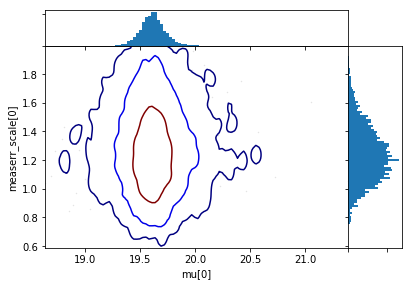

In [37]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


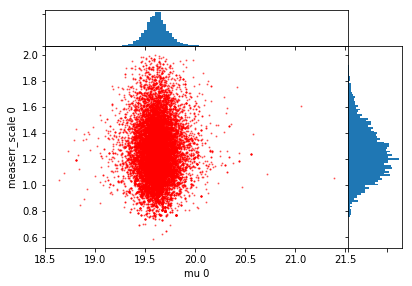

In [38]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


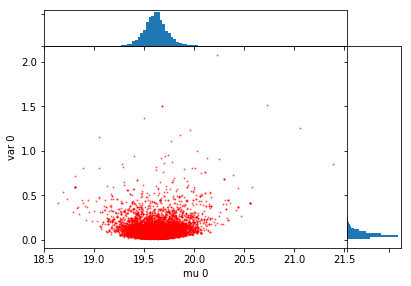

In [39]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


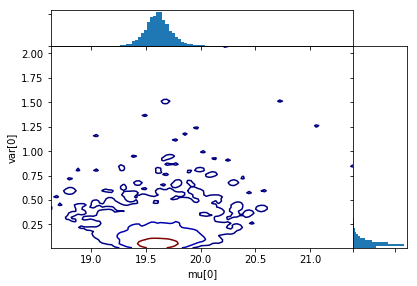

In [40]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

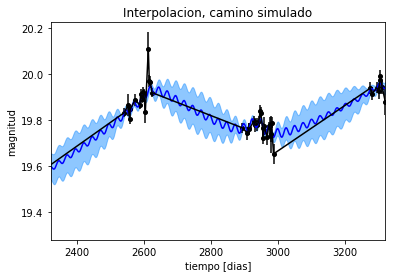

In [41]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

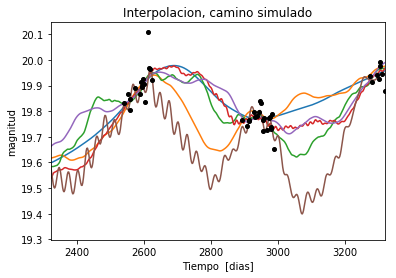

In [42]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')